# LeNet CNN implementation in Keras

Following code implements a Convolutional Neural Networks based on LeNet Architecture, trained and evaluated on MNIST dataset.
Implementation is done in TensorFlow-Keras framework.

References:
- Deep Learning for Vision Systems, Mohamed Elgendy
- Complete Tensorflow 2 and Keras Deep Learning Bootcamp, Jose Portilla [https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp/]

### Load MNIST Dataset 

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Convert train and test data to 32-bit float data type.

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Visualize Images

In [6]:
import matplotlib.pyplot as plt
import numpy as np

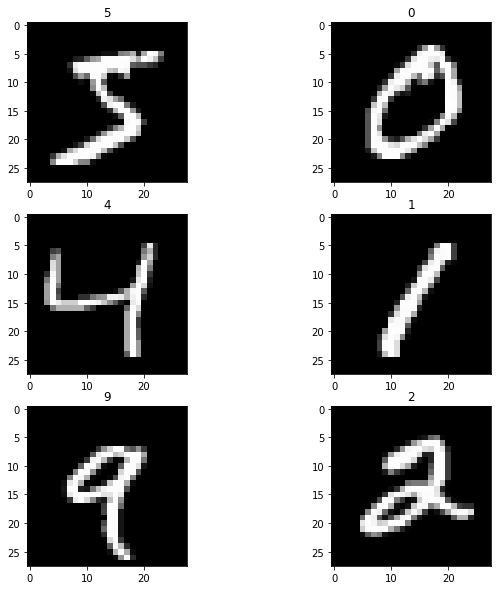

In [9]:
fig = plt.figure(figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### Preprocess Labels

Apply categorical encoding for labels.

In [4]:
from keras.utils import np_utils

In [10]:
y_cat_train = np_utils.to_categorical(y_train,num_classes=10)
y_cat_test = np_utils.to_categorical(y_test,num_classes=10)

In [11]:
y_train.shape

(60000,)

In [12]:
y_cat_train.shape

(60000, 10)

### Preprocess Images 

Apply standard normalization for pixel image values.

In [13]:
mean = np.mean(X_train)
std = np.std(X_train)

In [14]:
X_train = (X_train-mean) / (std+1e-7)
X_test = (X_test-mean) / (std+1e-7)

### Reshape Data

Reshape train and test data for model input. 

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Create the Model

Creating LeNet Neural Network architecture model. For details check the paper: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf 

Note that, this is not the exact implementation of the architecture proposed in the paper.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D

In [18]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(2,2), strides=(1,1), activation='tanh', padding='same', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         30        
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

### Compile the Model 

Using Adam as optimizer method, as it yields plausible results. Using categorical cross entropy loss, because this problem is a multi-class classification problem. Accuracy is used as an evaluation metric.

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Create Callbacks for training

In [22]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

Creating Learning Rate Scheduler callback function, whose purpose is to adjust learning rate in different epochs.

In [23]:
def lr_schedule(epoch):
    if epoch<=2:
        lr = 5e-4
    elif epoch>2 and epoch<=4:
        lr = 1e-4
    elif epoch<4 and epoch<=8:
        lr = 5e-5
    else:
        lr = 1e-5
    
    return lr

In [25]:
lr_scheduler = LearningRateScheduler(schedule=lr_schedule)

Creating Model Checkpoint callback function that will save the model weights as a file.

In [26]:
checkpoint = ModelCheckpoint('lenet_mnist.best.hdf5', save_best_only=True, verbose=1)

Creating Early Stopping callback function that will stop training based on evaluation of specified metric.

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Train the Model 

In [28]:
model.fit(x=X_train,
          y=y_cat_train,
          batch_size=32,
          epochs=20,
          validation_split=0.2,
          callbacks=[lr_scheduler, checkpoint, early_stop])

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2952 - accuracy: 0.9123
Epoch 1: val_loss improved from inf to 0.13968, saving model to lenet_mnist.best.hdf5
1500/1500 [==============================] - 14s 7ms/step - loss: 0.2951 - accuracy: 0.9124 - val_loss: 0.1397 - val_accuracy: 0.9597 - lr: 5.0000e-04
Epoch 2/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.1085 - accuracy: 0.9671
Epoch 2: val_loss improved from 0.13968 to 0.08266, saving model to lenet_mnist.best.hdf5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1085 - accuracy: 0.9671 - val_loss: 0.0827 - val_accuracy: 0.9750 - lr: 5.0000e-04
Epoch 3/20
1492/1500 [============================>.] - ETA: 0s - loss: 0.0683 - accuracy: 0.9789
Epoch 3: val_loss improved from 0.08266 to 0.07260, saving model to lenet_mnist.best.hdf5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0681 - accuracy: 0.9788 - val_loss: 0.0726 - val_accuracy: 0.9772 - lr

Load the best model by calling this function:

In [29]:
model.load_weights('lenet_mnist.best.hdf5')

### Evaluate Results

In [30]:
import pandas as pd

<AxesSubplot:>

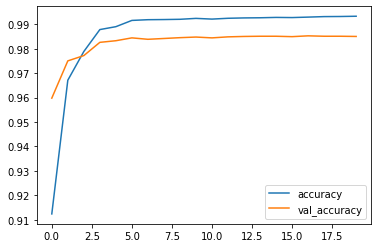

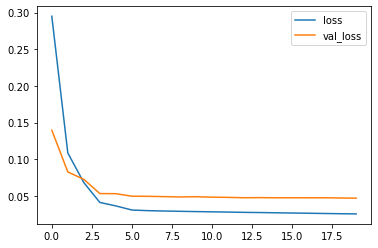

In [31]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [32]:
evaluation = model.evaluate(x= X_test, y= y_cat_test)
print("Classification loss on test set: " + str(evaluation[0]))
print("Classification accuracy on test set: " + str(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9858
Classification loss on test set: 0.04002561792731285
Classification accuracy on test set: 0.98580002784729


#### Classification report

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
pred = model.predict(X_test)
predictions = []
for i in pred:
    predictions.append(np.argmax(i))

313/313 [==============================] - 1s 3ms/step


In [36]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Confusion Matrix 

In [37]:
import seaborn as sns

In [38]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[ 970    0    1    0    1    0    2    2    3    1]
 [   0 1128    2    1    0    1    2    0    1    0]
 [   1    1 1023    0    1    0    0    3    3    0]
 [   0    0    3  997    0    3    0    1    3    3]
 [   0    0    1    0  967    0    5    3    0    6]
 [   2    0    0    7    0  876    5    1    0    1]
 [   2    1    1    0    3    2  947    0    2    0]
 [   0    1    7    3    1    0    0 1013    0    3]
 [   4    0    1    3    2    3    0    3  955    3]
 [   3    2    1    3    8    5    0    3    2  982]]


<AxesSubplot:>

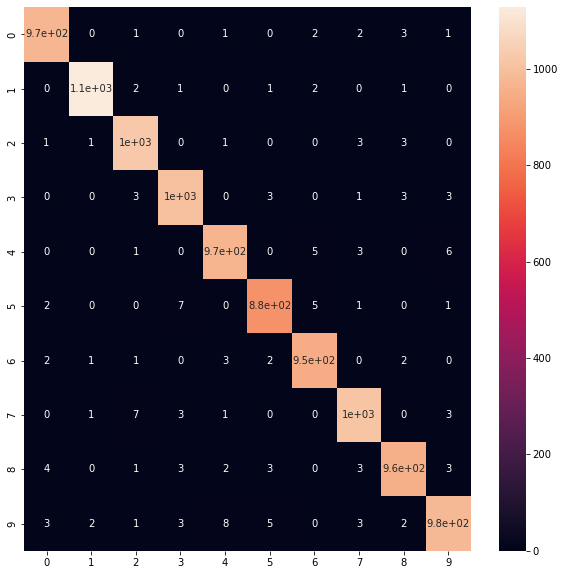

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix, annot=True)